**Acropora tenuis spp in the central Philippines - Depth and heterozygosity by cryptic taxa**\
_Inputs: *.ldepth files created by vcftools for each cryptic taxa; *.het files created by vcftools for each cryptic taxa; *.relatedness2 files created by vcftools for each cryptic tax_\
Comparing read depth across loci and individuals by cryptic taxa\
Comparing heterozygosity and inbreeding coefficients (FIS) by cryptic taxa\
Created by Jaelyn Bos, November 2024

In [1]:
#Loading required packages
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [21]:
#Set working directory
setwd('/hb/home/jbos/')

In [36]:
#Function to calculated observed and expected heterozygosity from observed and expected homozygosity, and combine with latitudes and longitudes by site
het <-function(hetdat){
  hetdat$E.HET<-hetdat$N_SITES - hetdat$E.HOM
  hetdat$O.HET<-hetdat$N_SITES - hetdat$O.HOM
  hetdat$Pop <- substr(hetdat$INDV,start=1,stop=5)
  hetdat<-left_join(hetdat,sites,by="Pop")
  return(hetdat)
}

**Depth by cyptic taxa**

In [5]:
#Load mean depth by locus data for each cryptic taxa
ldepth1 <- read.table('/hb/scratch/jbos/spp1/depth1c.ldepth.mean',header=TRUE)
ldepth2 <- read.table('/hb/scratch/jbos/spp2b/depth2c.ldepth.mean',header=TRUE)
ldepth3 <- read.table('/hb/scratch/jbos/spp3/depth3c.ldepth.mean',header=TRUE)
ldepth4 <- read.table('/hb/scratch/jbos/spp4/depth4c.ldepth.mean',header=TRUE)

Next, we make histograms of mean depth by locus for each cryptic taxa

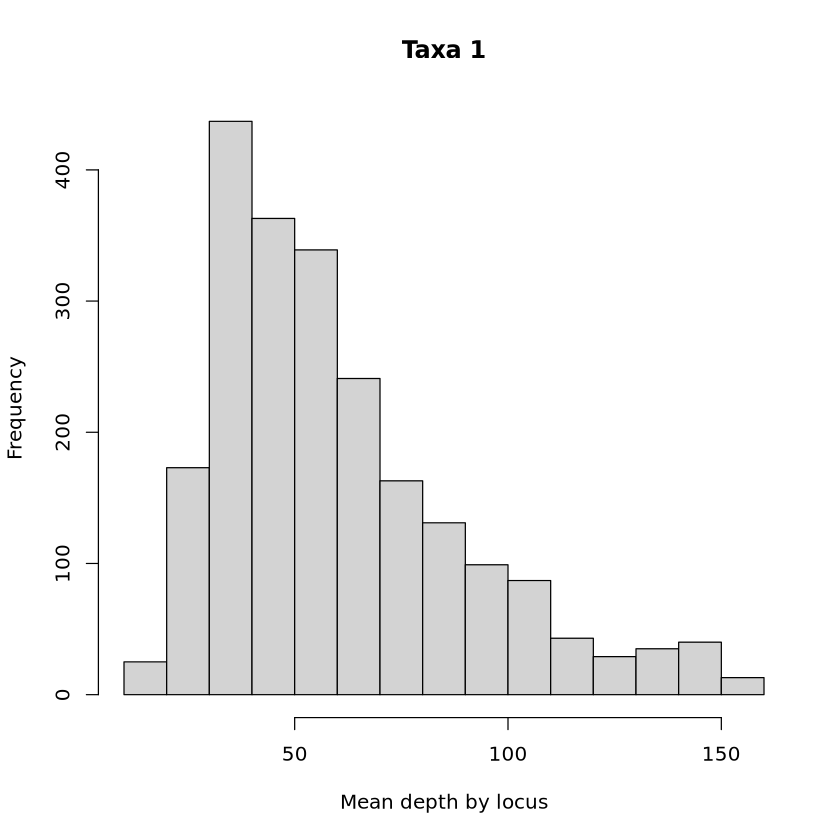

In [7]:
hist(ldepth1$MEAN_DEPTH,main="Taxa 1", xlab = "Mean depth by locus")

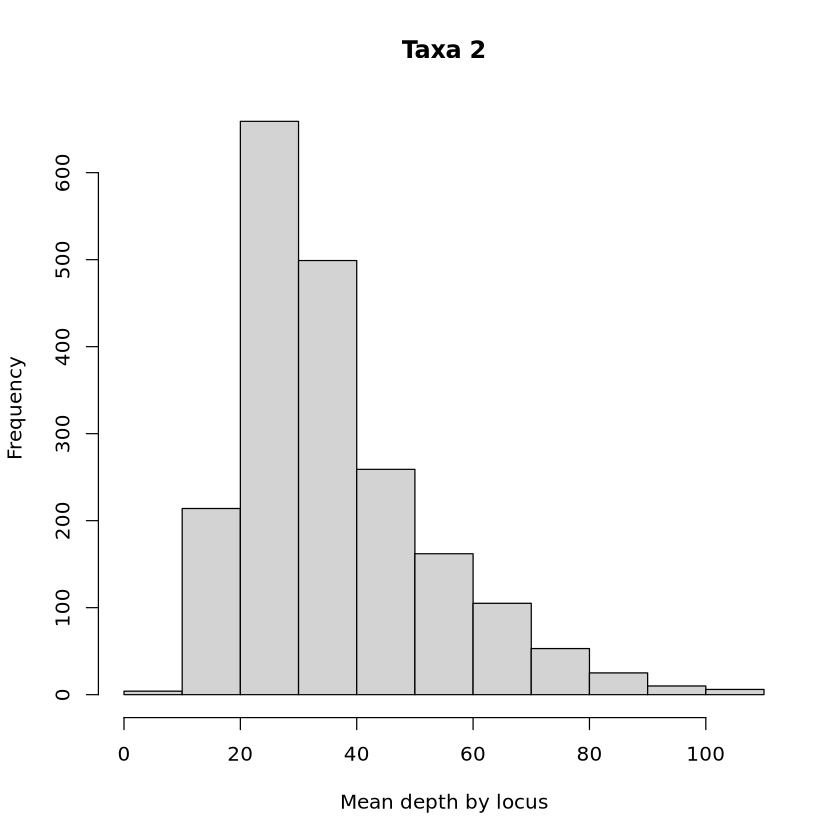

In [8]:
hist(ldepth2$MEAN_DEPTH,main="Taxa 2", xlab = "Mean depth by locus")

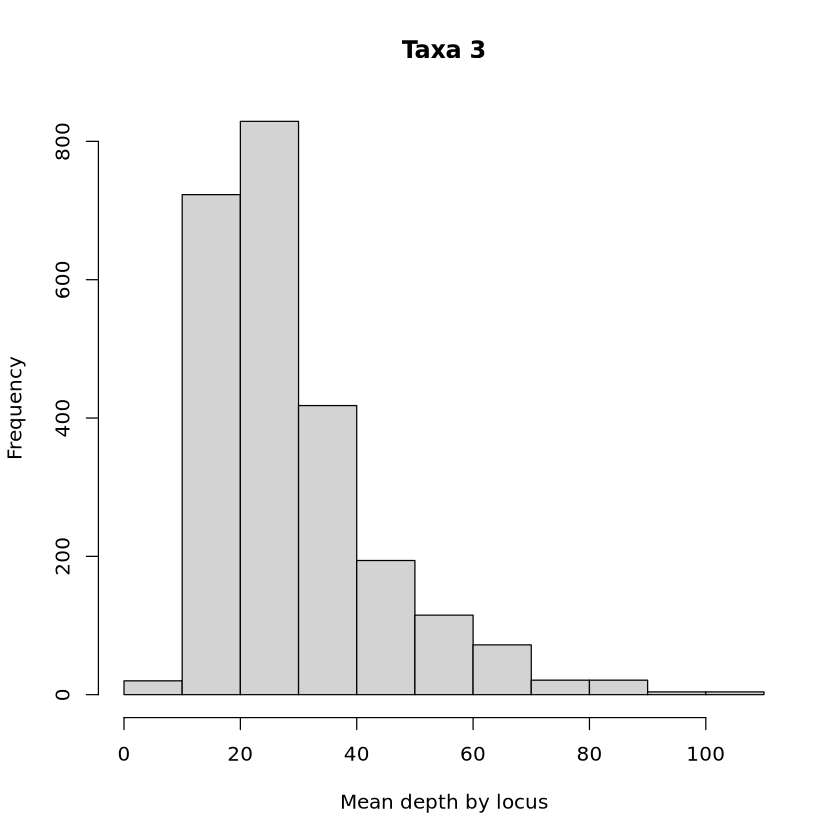

In [9]:
hist(ldepth3$MEAN_DEPTH,main="Taxa 3", xlab = "Mean depth by locus")

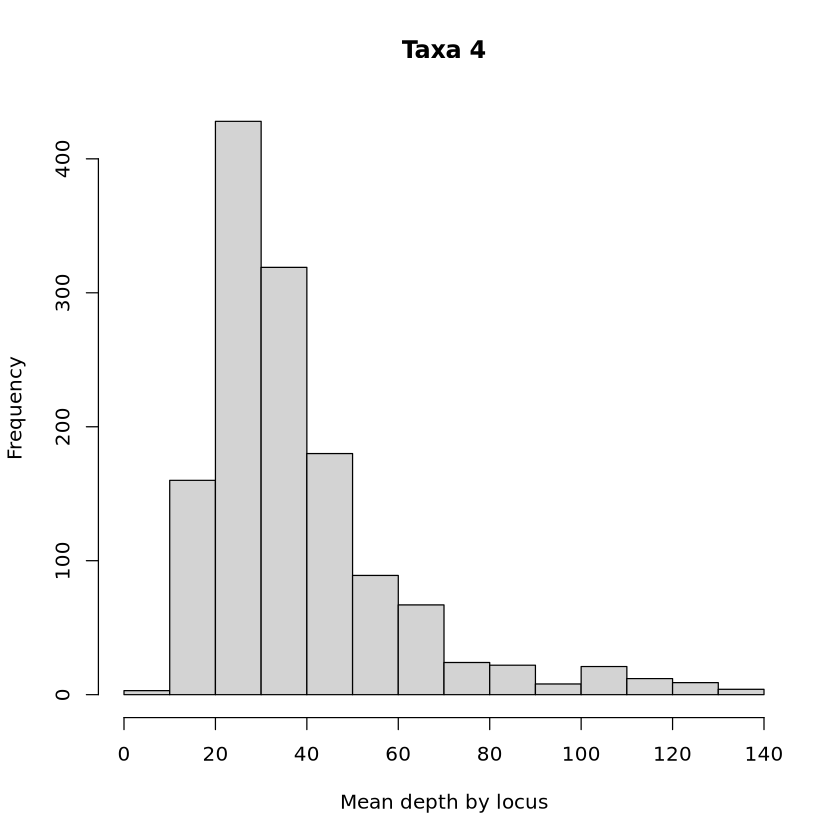

In [10]:
hist(ldepth4$MEAN_DEPTH,main="Taxa 4", xlab = "Mean depth by locus")

In [12]:
#Create combined dataset in order to produce boxplot comparing mean depth between cryptic taxa
ldepth1$taxa <- 'taxa1'
ldepth2$taxa <- 'taxa2'
ldepth3$taxa <- 'taxa3'
ldepth4$taxa <- 'taxa4'

locus_depth <- bind_rows(ldepth1,ldepth2,ldepth3,ldepth4)
locus_depth$taxa <- as.factor(locus_depth$taxa)
colnames(locus_depth)

[1] "CHROM"      "POS"        "MEAN_DEPTH" "VAR_DEPTH"  "taxa"

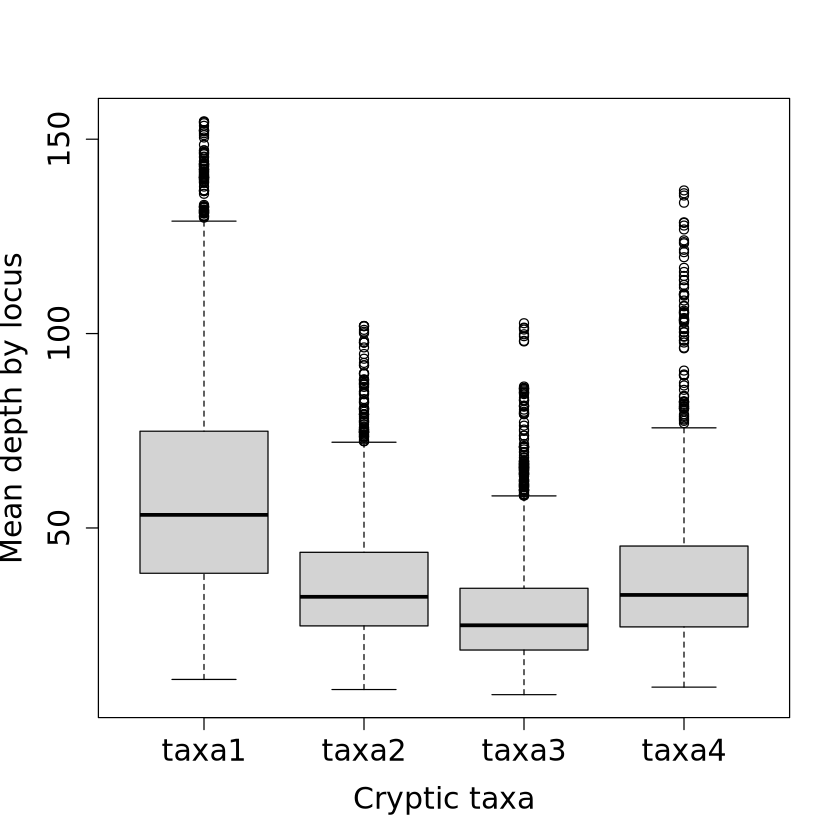

In [14]:
#Boxplot of mean read depth per locus by cryptic taxa
boxplot(MEAN_DEPTH ~ taxa, data=locus_depth,ylab="Mean depth by locus",xlab="Cryptic taxa",cex.lab=1.5,cex.axis=1.5)

**Heterozygosity by cryptic taxa**

In [37]:
het1 <- read.table('taxa1_het3.het',header=TRUE,sep = "\t")
het2 <- read.table('taxa2_het3.het',header=TRUE,sep = "\t")
het3 <- read.table('taxa3_het3.het',header=TRUE,sep = "\t")
het4 <- read.table('taxa4_het3.het',header=TRUE,sep = "\t")

In [38]:
#Latitudes and longitudes for each location
sites <- read.csv("all_Atenuis_sites_FIXED.csv")
colnames(sites)<-c('LONGITUDE','LATITUDE','Pop')

In [39]:
het1 <-het(het1)
het2 <-het(het2)
het3 <-het(het3)
het4 <-het(het4)

**Boxplot of F by cryptic taxa**

In [40]:
het1$taxa <- 'taxa1'
het2$taxa <- 'taxa2'
het3$taxa <- 'taxa3'
het4$taxa <- 'taxa4'

In [41]:
het <- bind_rows(het1,het2,het3,het4)
het$taxa <- as.factor(het$taxa)
colnames(het)

[1] "INDV"      "O.HOM."    "E.HOM."    "N_SITES"   "F"         "E.HET"    
 [7] "O.HET"     "Pop"       "LONGITUDE" "LATITUDE"  "taxa"

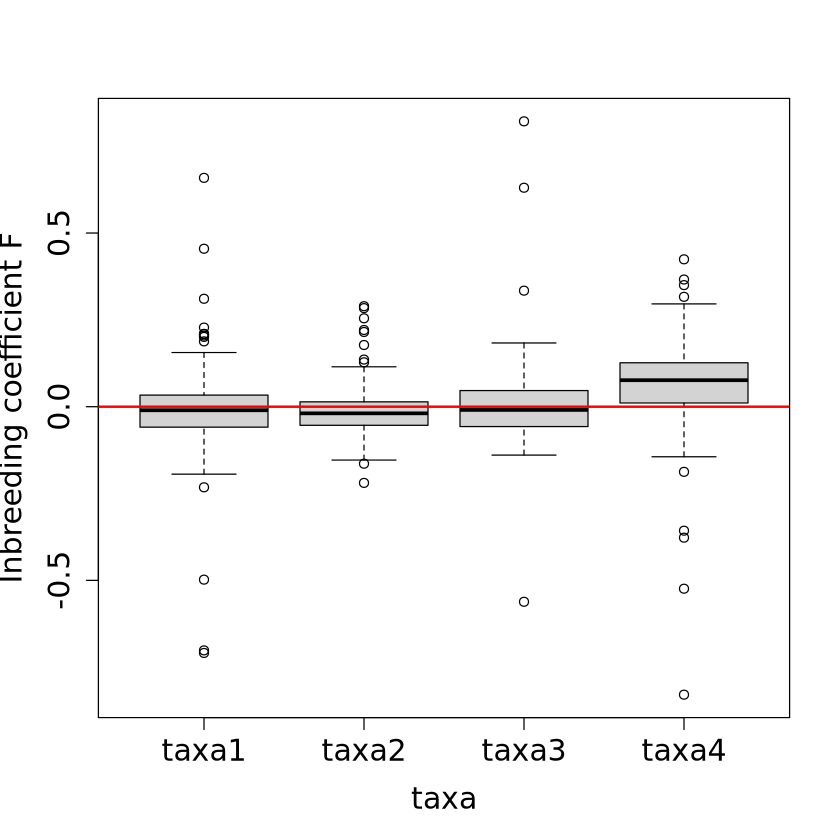

In [43]:
#Boxplot of F (inbreeding coefficient) by each cryptic taxa
boxplot(F ~ taxa, data= het, cex.lab=1.5, cex.axis=1.5,ylab='Inbreeding coefficient F')
abline(h=0,col='red',lwd=2)

**Histograms of individual inbreeding coefficients (F) for each cryptic taxa**

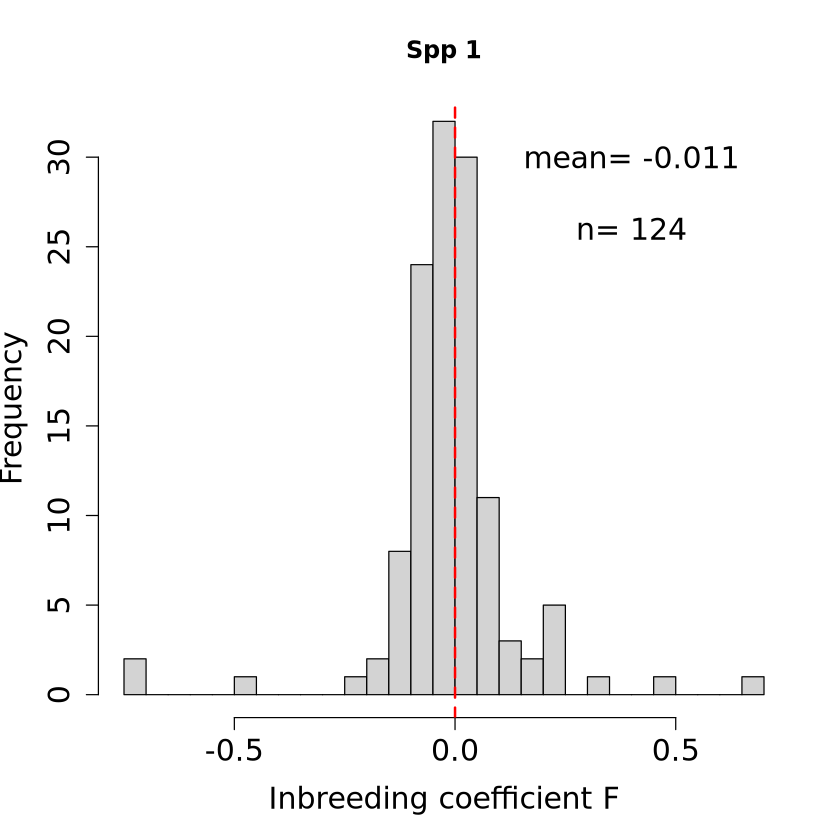

In [46]:
hist(het1$F,breaks=24,main='Spp 1',cex.axis=1.5,xlab='Inbreeding coefficient F',cex.lab=1.5)
abline(v=0,col='red',lwd=2,lty=2)
text(x=0.4,y=30,label=paste('mean=',round(mean(het1$F),3)),cex=1.5)
text(x=0.4,y=26,label=paste('n=',nrow(het1)),cex=1.5)

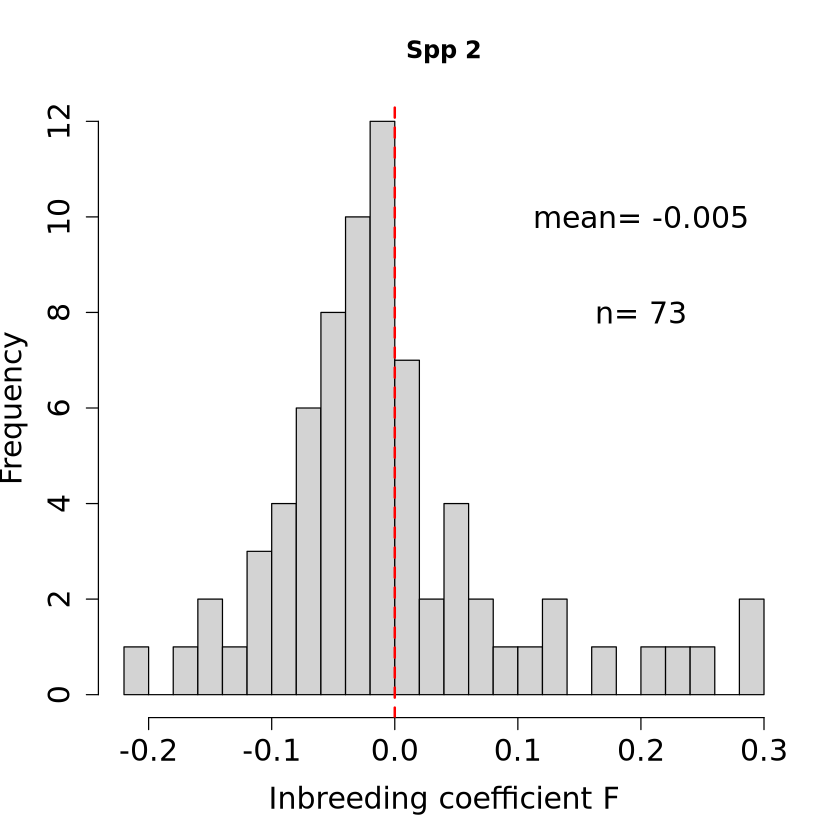

In [47]:
hist(het2$F,breaks=24,main='Spp 2',cex.axis=1.5,xlab='Inbreeding coefficient F',cex.lab=1.5)
abline(v=0,col='red',lwd=2,lty=2)
text(x=0.2,y=10,label=paste('mean=',round(mean(het2$F),3)),cex=1.5)
text(x=0.2,y=8,label=paste('n=',nrow(het2)),cex=1.5)

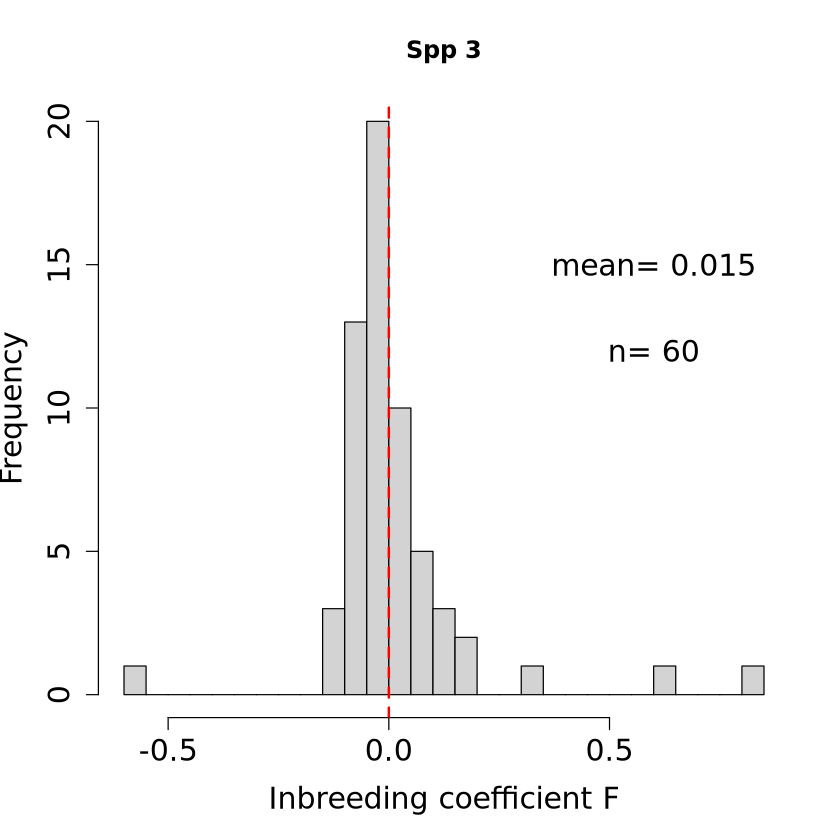

In [48]:
hist(het3$F,breaks=24,main='Spp 3',cex.axis=1.5,xlab='Inbreeding coefficient F',cex.lab=1.5)
abline(v=0,col='red',lwd=2,lty=2)
text(x=0.6,y=15,label=paste('mean=',round(mean(het3$F),3)),cex=1.5)
text(x=0.6,y=12,label=paste('n=',nrow(het3)),cex=1.5)

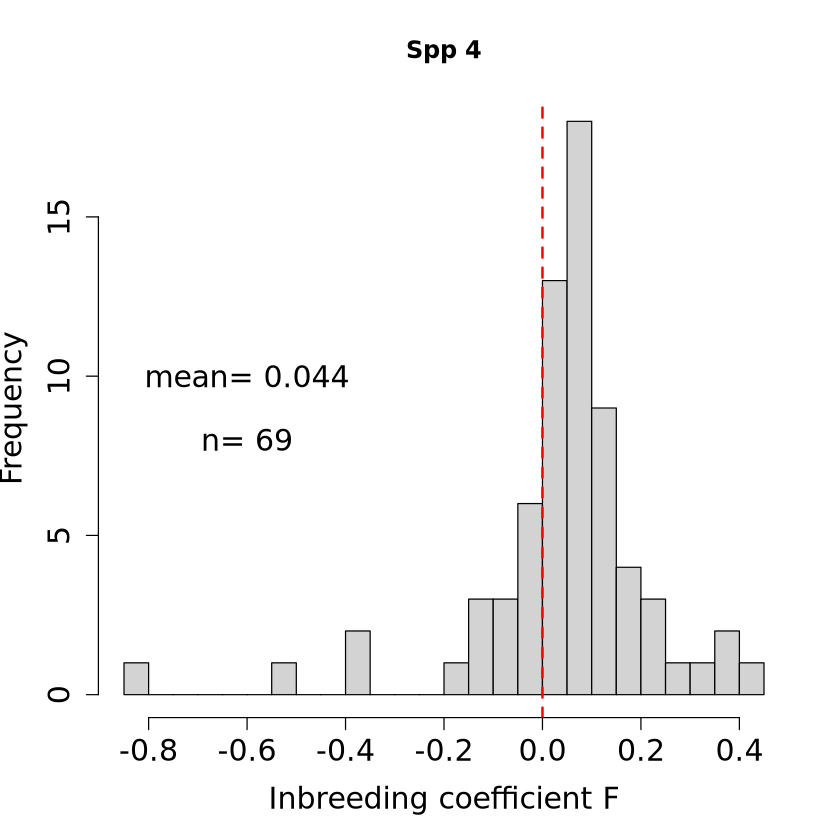

In [49]:
hist(het4$F,breaks=24,main='Spp 4',cex.axis=1.5,xlab='Inbreeding coefficient F',cex.lab=1.5)
abline(v=0,col='red',lwd=2,lty=2)
text(x=-0.6,y=10,label=paste('mean=',round(mean(het4$F),3)),cex=1.5)
text(x=-0.6,y=8,label=paste('n=',nrow(het4)),cex=1.5)

**Relatedness coefficient phi**

In [51]:
#Read in relatedness coefficients for each pair of individuals within cryptic taxa
ret1<-read.table("cluster1_relatedness.relatedness2",header=TRUE,sep="\t")
ret1<-arrange(ret1,INDV1,INDV2)
ret2<-read.table("cluster2_relatedness.relatedness2",header=TRUE,sep="\t")
ret2<-arrange(ret2,INDV1,INDV2)
ret3<-read.table("cluster3_relatedness.relatedness2",header=TRUE,sep="\t")
ret3<-arrange(ret3,INDV1,INDV2)
ret4<-read.table("cluster4_relatedness.relatedness2",header=TRUE,sep="\t")
ret4<-arrange(ret4,INDV1,INDV2)

**Relatedness heatmaps**

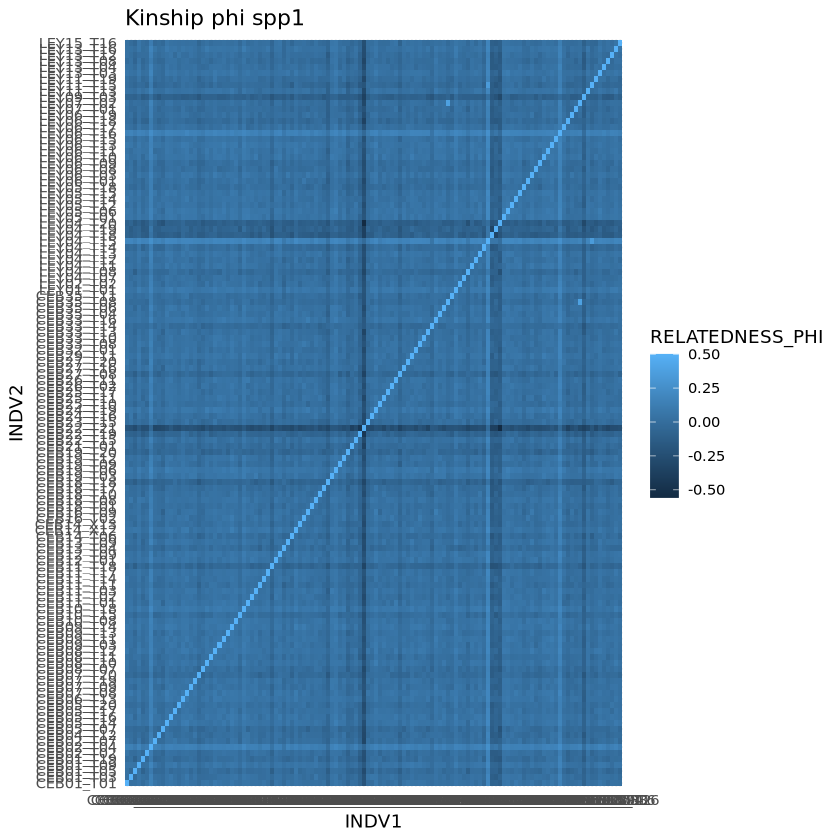

In [52]:
ggplot(ret1, aes(INDV1, INDV2, fill= RELATEDNESS_PHI)) + 
  geom_tile() +
  scale_color_viridis_c() +
  ggtitle("Kinship phi spp1")+
  theme_minimal()

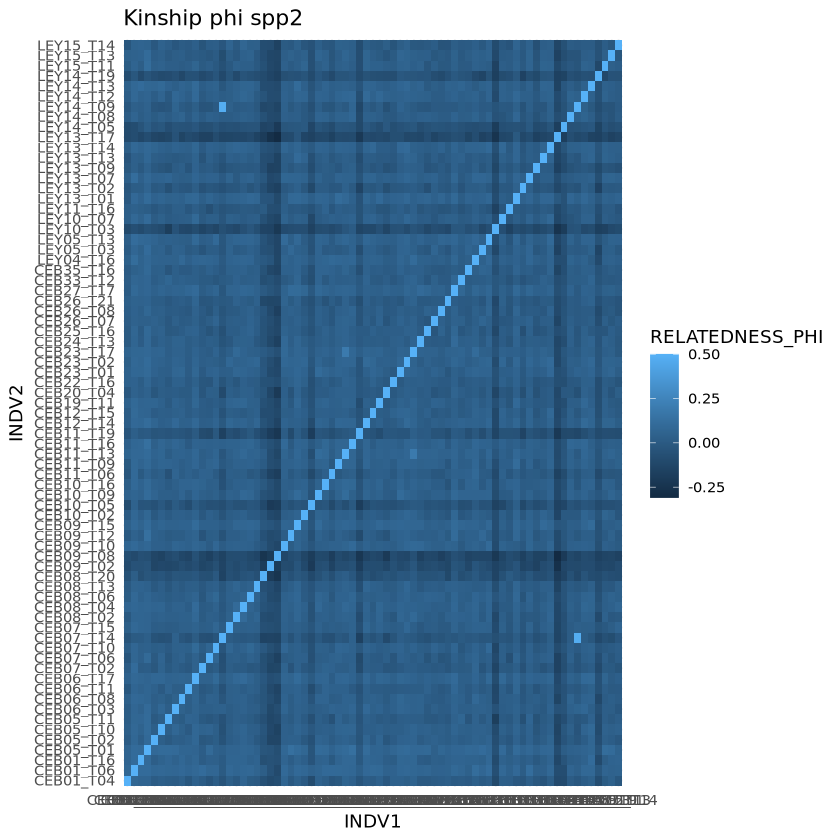

In [53]:
ggplot(ret2, aes(INDV1, INDV2, fill= RELATEDNESS_PHI)) + 
    geom_tile() +
    scale_color_viridis_c() +
    ggtitle("Kinship phi spp2")+
    theme_minimal()

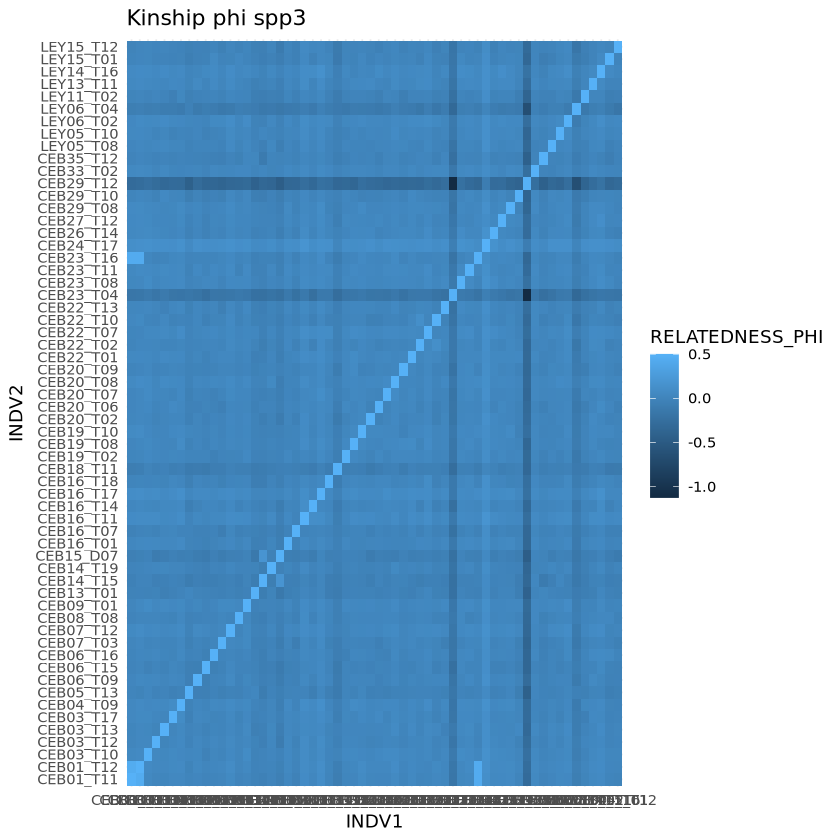

In [54]:
ggplot(ret3, aes(INDV1, INDV2, fill= RELATEDNESS_PHI)) + 
    geom_tile() +
    scale_color_viridis_c() +
    ggtitle("Kinship phi spp3")+
   theme_minimal()

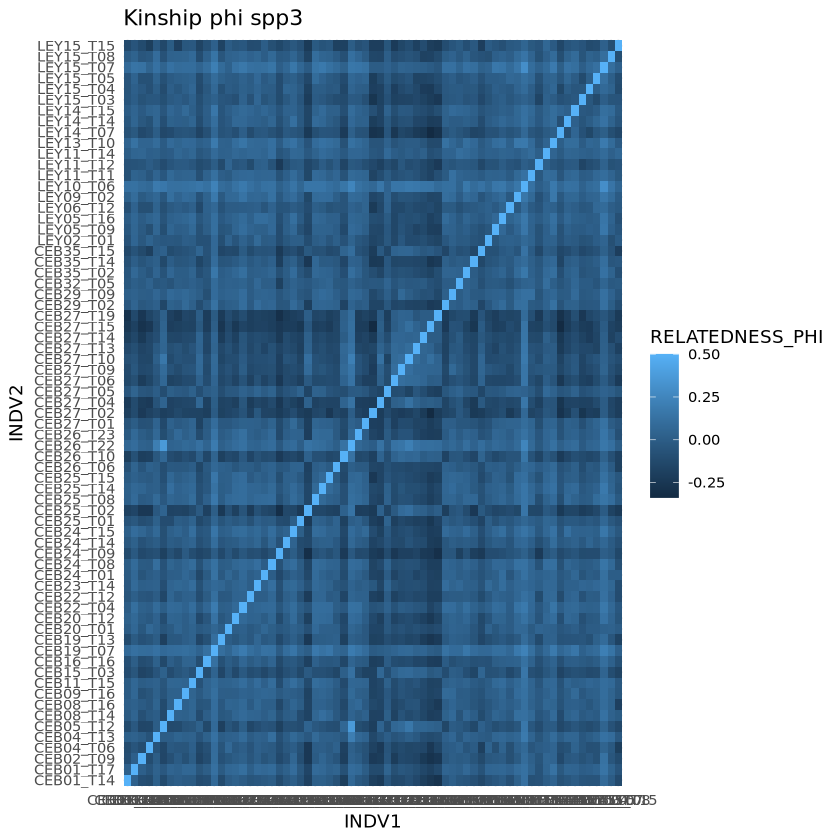

In [55]:
ggplot(ret4, aes(INDV1, INDV2, fill= RELATEDNESS_PHI)) + 
  geom_tile() +
  scale_color_viridis_c() +
  ggtitle("Kinship phi spp3")+
  theme_minimal()

**Possible clones/inbred siblings (phi > 0.4)**

In [58]:
clones1 <- ret1[ret1$RELATEDNESS_PHI>0.4,]
clones1 <- clones1[clones1$INDV1 != clones1$INDV2,]
clones1

INDV1,INDV2,N_AaAa,N_AAaa,N1_Aa,N2_Aa,RELATEDNESS_PHI
<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>


In [59]:
clones2 <- ret2[ret2$RELATEDNESS_PHI>0.4,]
clones2 <- clones2[clones2$INDV1 != clones2$INDV2,]
clones2

,INDV1,INDV2,N_AaAa,N_AAaa,N1_Aa,N2_Aa,RELATEDNESS_PHI
,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>
1089,CEB07_T14,LEY14_T09,436,1,442,471,0.475356
4833,LEY14_T09,CEB07_T14,436,1,471,442,0.475356


In [60]:
clones3 <- ret3[ret3$RELATEDNESS_PHI>0.4,]
clones3 <- clones3[clones3$INDV1 != clones3$INDV2,]
clones3

,INDV1,INDV2,N_AaAa,N_AAaa,N1_Aa,N2_Aa,RELATEDNESS_PHI
,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>
2,CEB01_T11,CEB01_T12,569,1,632,656,0.440217
43,CEB01_T11,CEB23_T16,523,2,632,563,0.434310
61,CEB01_T12,CEB01_T11,569,1,656,632,0.440217
103,CEB01_T12,CEB23_T16,526,0,656,563,0.431501
2521,CEB23_T16,CEB01_T11,523,2,563,632,0.434310
2522,CEB23_T16,CEB01_T12,526,0,563,656,0.431501


In [61]:
clones4 <- ret4[ret4$RELATEDNESS_PHI>0.4,]
clones4 <- clones4[clones4$INDV1 != clones4$INDV2,]
clones4

INDV1,INDV2,N_AaAa,N_AAaa,N1_Aa,N2_Aa,RELATEDNESS_PHI
<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>


**Relatedness histograms**

In [63]:
#Exclude Phi between individual and itself
ret1a <- ret1[ret1$INDV1 != ret1$INDV2,]
ret2a <- ret2[ret2$INDV1 != ret2$INDV2,]
ret3a <- ret3[ret3$INDV1 != ret3$INDV2,]
ret4a <- ret4[ret4$INDV1 != ret4$INDV2,]

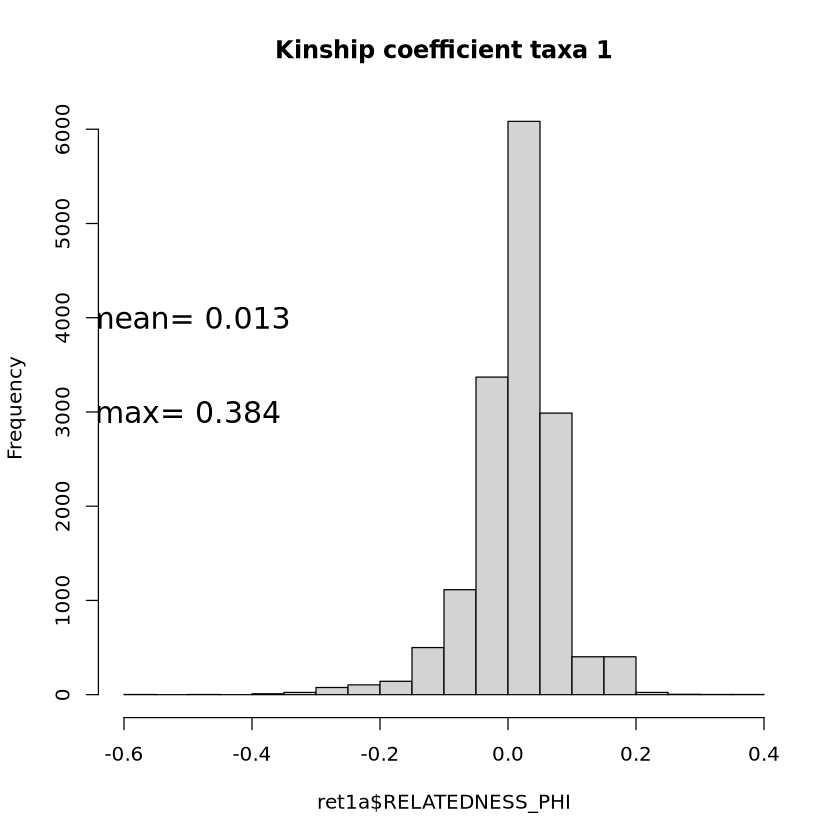

In [65]:
hist(ret1a$RELATEDNESS_PHI,main="Kinship coefficient taxa 1",breaks=16)
text(x=-0.5,y=4000,label=paste('mean=',round(mean(ret1a$RELATEDNESS_PHI),3)),cex=1.5)
text(x=-0.5,y=3000,label=paste('max=',round(max(ret1a$RELATEDNESS_PHI),3)),cex=1.5)

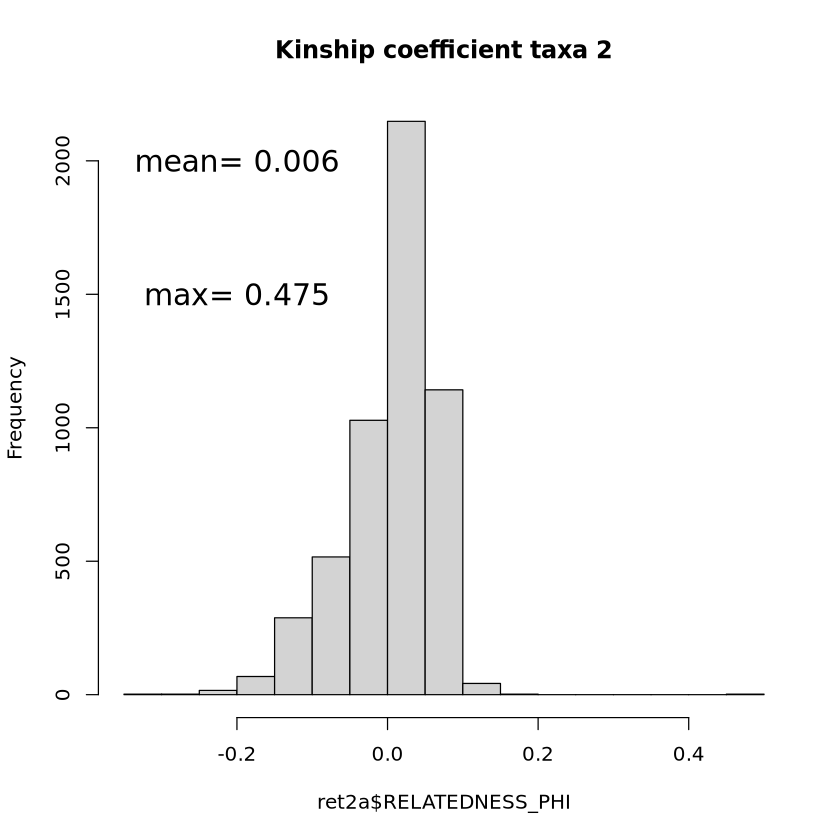

In [66]:
hist(ret2a$RELATEDNESS_PHI,main="Kinship coefficient taxa 2",breaks=16)
text(x=-0.2,y=2000,label=paste('mean=',round(mean(ret2a$RELATEDNESS_PHI),3)),cex=1.5)
text(x=-0.2,y=1500,label=paste('max=',round(max(ret2a$RELATEDNESS_PHI),3)),cex=1.5)

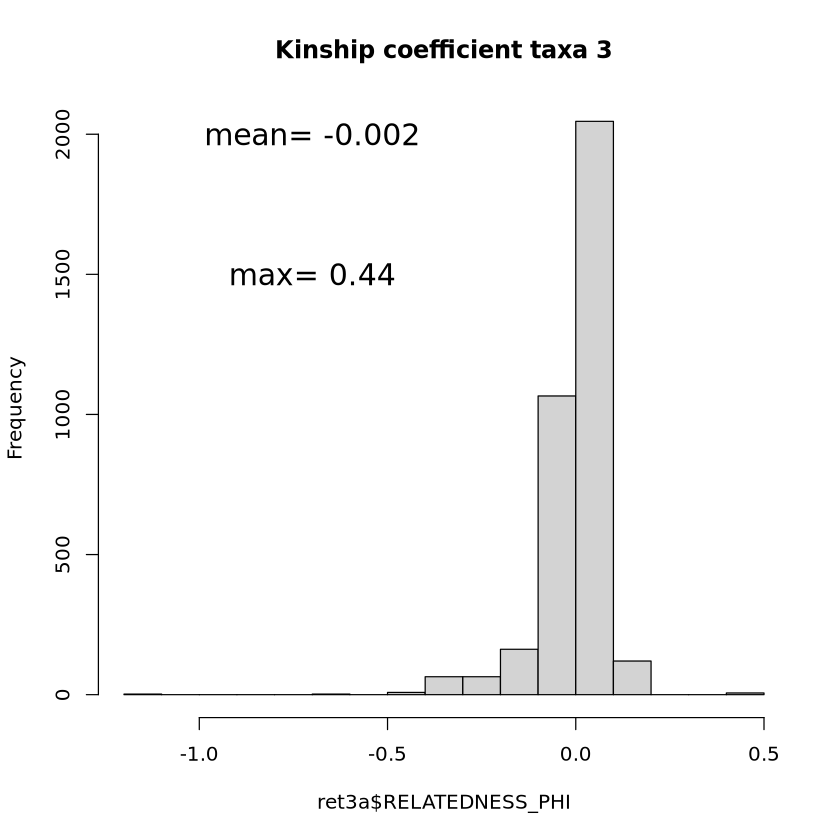

In [67]:
hist(ret3a$RELATEDNESS_PHI,main="Kinship coefficient taxa 3",breaks=16)
text(x=-0.7,y=2000,label=paste('mean=',round(mean(ret3a$RELATEDNESS_PHI),3)),cex=1.5)
text(x=-0.7,y=1500,label=paste('max=',round(max(ret3a$RELATEDNESS_PHI),3)),cex=1.5)

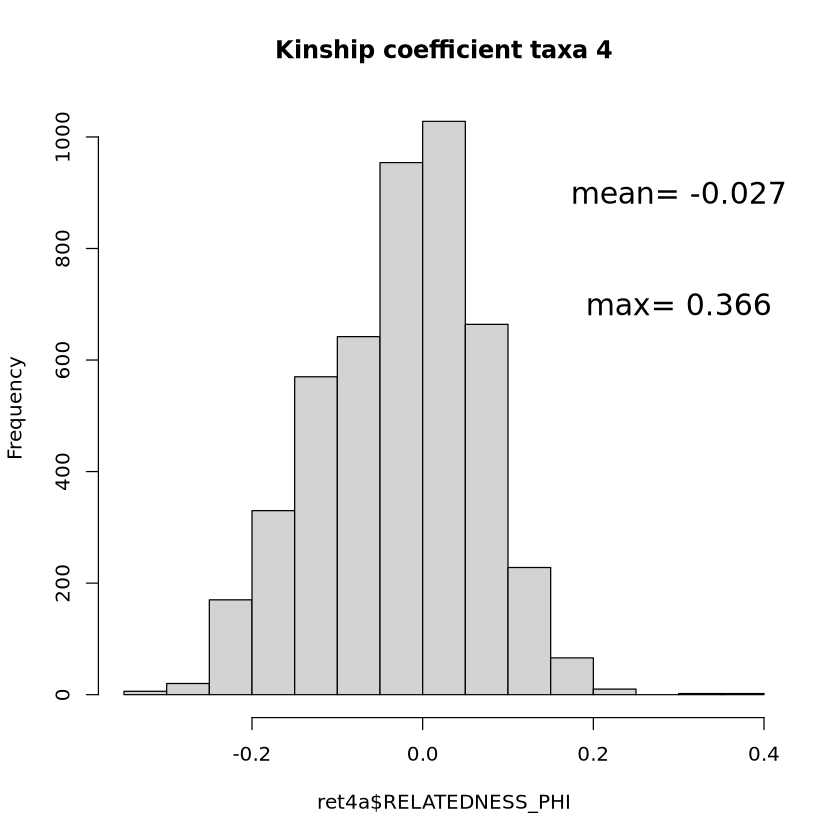

In [68]:
hist(ret4a$RELATEDNESS_PHI,main="Kinship coefficient taxa 4",breaks=16)
text(x=0.3,y=900,label=paste('mean=',round(mean(ret4a$RELATEDNESS_PHI),3)),cex=1.5)
text(x=0.3,y=700,label=paste('max=',round(max(ret4a$RELATEDNESS_PHI),3)),cex=1.5)